CIS 9 - Lab 4: NLP

In [385]:
# Name: Ulises Marian

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk

There are 2 different NLP tasks in this lab. They are in cells numbered 1a - 1m, and 2a - 2h
<br>There are more steps in question 1 because each step is one logical block of code to guide you.

1. Use NLTK to build a model that analyzes tweets and determine if they're racist/sexist or not. There are 2 input files _train.csv_ and _test.csv_ from [source](https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech).
<br>In the train.csv file the label 0 means the tweet is not racist/sexist, and the label 1 means the tweet is racist/sexist. In test.csv there are only the tweets.

1a. Read data from train.csv into a DataFrame, print the size of the DataFrame and the first few lines of data.
<br>This data will be used to train the model, as its name implies.

In [2]:
data = pd.read_csv("train.csv", encoding='ISO-8859-1')
print(data.shape)
data.head(5)

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


1b. First get an overview of the data by finding the percentage of _'good'_ tweets (not racist/sexist) and the percentage of _'bad'_ tweets (racist/sexist). This helps us determine if there is enough representation of both types in the dataset.
<br>Print the percentages.

In [4]:
number_of_tweets = data.groupby("label").count()
#print(number_of_tweets)


#this one will add all the ones (1), thus the bad tweets
bad_tweets_num = data.label.sum()
total_number_of_tweets = data.label.count()
good_tweets_num = total_number_of_tweets - bad_tweets_num

percent_bad_tweets = bad_tweets_num / total_number_of_tweets * 100 #could also use len(data) instead of total_number_of_tweets
print(f"percentage of 'bad' tweets: {percent_bad_tweets}")

percent_good_tweets = good_tweets_num / total_number_of_tweets * 100

print(f"percentage of 'good' tweets: {percent_good_tweets}")

#this way we can get the number of good tweets those labeled zero (0)
#data[data.label == 0].count()

percentage of 'bad' tweets: 7.014579813528565
percentage of 'good' tweets: 92.98542018647143


1c. The hashtag denotes special meaning or theme in the tweet, so we'll use them to do a quick check of the labeling of the training data. Find and plot the 10 most used hashtags for the good tweets. The plot should show the hashtags and their counts.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ulisesmarian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


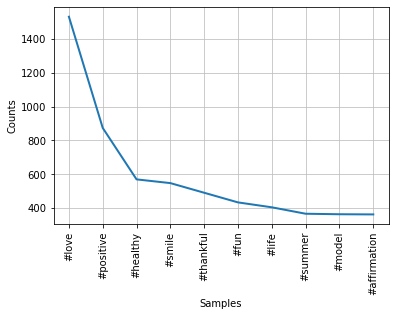

In [389]:
nltk.download('punkt') 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()

good_tweets = data[data.label == 0]
good_tweets

hashtags = []
for tweet in good_tweets.tweet:
    tweet = tt.tokenize(tweet)
    for word in tweet:
        if word.startswith('#'):
            hashtags.append(word)

        
for hashtag in hashtags: 
    if hashtag == "#":
        hashtags.remove(hashtag)
        
hashtags

#frequency distribution
freqD = nltk.FreqDist(hashtags)
#for key,val in freqD.items():
    #print(str(key) + ':' + str(val))
#print(len(freqD))

freqD.plot(10) 
plt.show()

Then find and plot the 10 most used hashtags for the bad tweets.
<br>Do the tags seem to agree with the labeling?
<br>Note: if you get a warning about certain characters not being displayed properly, you can ignore the warning. The result of the warning will show in the output but it's okay.

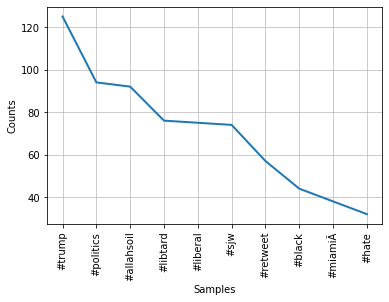

In [390]:
bad_tweets = data[data.label == 1]
bad_tweets

hashtags = []
for tweet in bad_tweets.tweet:
    tweet = tt.tokenize(tweet)
    for word in tweet:
        if word.startswith('#'):
            hashtags.append(word)

        
for hashtag in hashtags: 
    if hashtag == "#":
        hashtags.remove(hashtag)
        
hashtags

#frequency distribution
freqD = nltk.FreqDist(hashtags)
#for key,val in freqD.items():
    #print(str(key) + ':' + str(val))
#print(len(freqD))

freqD.plot(10) 
plt.show()

#The 'good' tags do agree with the labeling, and so do some of the 'bad' tags, 
#however, the latter require a lot more contextualization in order to justify their labeling.

1d. Create the y variable from the DataFrame.
<br>Print the size of y.

In [391]:
y = data.label
y.shape

(31962,)

Create the X variable from the DataFrame.
<br>Print the size of X and the first few lines of x.

In [392]:
X = data.drop(columns=["id", "label"])
print(X.shape)
X.head()

(31962, 1)


,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


1e. To start pre-processing the data, observe that the user names in the tweet start with '@'. A user name in the lines of X above is @user. These user names don't correlate with the labeling so you can remove them from the data.
<br>Remove all @names from the data and show the first few lines of X to see that they're gone.
<br>Hint: vectorized strings can make the job easier.

In [393]:
for i,sentence in enumerate(X.tweet):
    updated_string = sentence.replace("@user", '')
    X.tweet[i] = updated_string

X.head()

,tweet
0,when a father is dysfunctional and is so sel...
1,thanks for #lyft credit i can't use cause th...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


1f. Continue the pre-processing step by removing non-words, lowercase all words, removing stop words, and stemming the words. Print the resulting X variable. (You can change the variable name X if you want.)

In [394]:
nltk.download('stopwords') 
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenizer = RegexpTokenizer("[a-zA-Z']+")  #letters only (including contractions, thus apostrophe ('))

for i,sentence in enumerate(X.tweet):
    w = tokenizer.tokenize(sentence.lower())         # separate into words and lowercase each word
    w = [word for word in w if word not in stop_words]    # remove stop words
    w = [stemmer.stem(word) for word in w]    # find stem of each word
    w = ' '.join(w)         # join back into a string
    X.tweet[i] = w

X

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ulisesmarian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet
0,father dysfunct selfish drag kid dysfunct run
1,thank lyft credit can't use caus offer wheelch...
2,bihday majesti
3,model love u take u time ur
4,factsguid societi motiv
...,...
31957,ate isz youuu
31958,see nina turner airwav tri wrap mantl genuin h...
31959,listen sad song monday morn otw work sad
31960,sikh templ vandalis calgari wso condemn act


1g. Convert the strings in X to vectors of numbers. Show the size of the vectors.

In [395]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X["tweet"])    
X_vectors = vect.transform(X["tweet"])

X_vectors.shape

(31962, 31497)

1h. Split the dataset into training and testing sets and Show the size of the sets.

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y,test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25569, 31497) (25569,) (6393, 31497) (6393,)


1i. Use the Multinomial Naive Bayes model to train, then test the model.

In [397]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

1j. Show the accuracy of the model by displaying the accuracy score, confusion matrix, and F1 score.

In [398]:
from sklearn.metrics import f1_score

print(metrics.accuracy_score(y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted'))

metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

0.9471296730799311
0.945689069392553


array([[5798,  144],
       [ 194,  257]])

1k. In your own words:
<br>a. Analyze the accuracy, explaining what each of the 3 values mean.
<br>b. Between the accuracy score and the F1 score, which one should be used, and why? (Hint: this was discussed in the class notes)

In [399]:
#a
#The accuracy score represents the number of correct predictions. 
#E.g.,the algorithm correctly predicts which tweets are bad when they are actually bad tweets.
#This accuracy score is very high, since it is close to 1 (being 100% accurate)

#the f1 score also calculates the rate of correct predictions, 
#however, it takes into account the imbalance data.
#The f1 score is also very high, since it is close to 1 (being 100% accurate)


# confusion matrix:
#0 (in labels) is for good tweets, so there are 5807 correct and 144 wrong predictions
#1 is for bad tweets, thus there are 252 correct and 190 wrong predictions

#thus, the matrix sheds light on the fact that the tweets labeled as 'good' tweets, are in fact good tweets. 
#however, when it comes to the bad tweets, the majority of those labeled as 'bad' tweets,
#are in fact predicted as being 'good' tweets


#b
#Between the accuracy score and the F1 score, the F1 score should be used because the data is imbalanced, 
#That is, there is an unequal representation of "good tweets" (too many) vs "bad tweets" (too little)

1l. Prepare the data in _test.csv_ to test the model. This will take several steps so feel free to create multiple cells as needed. You'll find that separating the steps into different cells help during debugging since you only need to re-run part of the code.

In [400]:
test_data = pd.read_csv("test.csv", encoding='ISO-8859-1')
test_data = test_data.tweet   #keep only the tweets column

print(test_data.shape)
test_data.head()

(17197,)


0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [401]:
#cleaning data...removing non-words, stop-words, '@user'...

for i,sentence in enumerate(test_data):
    updated_string = sentence.replace("@user", '')        #remove '@user' from every tweet
    w = tokenizer.tokenize(updated_string.lower())        # separate into words and lowercase each word
    w = [word for word in w if word not in stop_words]    # remove stop words
    w = [stemmer.stem(word) for word in w]                # find stem of each word
    w = ' '.join(w)         # join back into a string
    test_data[i] = w

test_data.head(5)

0    studiolif aislif requir passion dedic willpow ...
1     white supremacist want everyon see new bird movi
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye harrypott...
4    rd bihday amaz hilari nephew eli ahmir uncl da...
Name: tweet, dtype: object

In [402]:
vectorizer = CountVectorizer()
vectorizer.fit(test_data)    
test_data_vectors = vect.transform(test_data)
#print(test_data_vectors[0])

test_data_vectors.shape

(17197, 31497)

In [403]:
y_output = classifier.predict(test_data_vectors)
y_output

array([0, 0, 0, ..., 0, 0, 0])

1m. After you have the outcome of the test data, print the number of good tweets and the number of bad tweets that the model determined from the test data.
<br>Based on the accuracy measurement of the model, answer these questions in your own words:
- how confident are you with the 2 numbers?
- is the model more likely to predict the wrong way for a good tweet? how about for a bad tweet?

In [405]:
amount_good_tweets = len([num for num in y_output if num == 0])
print(f"number of good tweets: {amount_good_tweets}")


amount_bad_tweets = len([num for num in y_output if num == 1])
print(f"number of bad tweets: {amount_bad_tweets}")

# Based on the accuracy measurement of the model, I am confident with the 2 numbers, since given that the 
# data is imbalanced, I was expecting a very low number of bad tweets, and a very high number of good tweets.

# The model is more likely to predict the wrong way for a bad tweet, since the data is imbalanaced, 
# i.e., there are too little bad tweets and a lot of good tweets that are being trained,
# thus the algorithm often labels a bad tweet as a good tweet.
# And regarding a good tweet, the model is not likely to predict the wrong label/classification

number of good tweets: 16452
number of bad tweets: 745


2. Use NLTK to build a model to analyze yelp reviews and predict whether the review would have a 1 star or 5 star rating.
<br>The input file is _yelp.csv_ from [source](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv)

2a. Read data from yelp.csv, print the size of the DataFrame and the first few lines of data.

In [2]:
df = pd.read_csv("yelp.csv", encoding='ISO-8859-1')

print(df.shape)
df.head()

(10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


The model needs to "read" the 'text' column and determine what the number in the 'stars' column would be. The star values are 1 to 5. For this model, we only need to consider the 1-star (worst) and the 5-star (best) reviews.

2b. To prepare you to working independently in the final project, it's up to you to pre-process the data, build the model, and show the accuracy of the model.

Generally the class notes have the material that you need to do the work. If you need to look up and use a new function, you can look up online or ask me. But you should not use a completely different way to build the model than what's discussed in class.

For each logical step (block of code to do a task), create 2 cells: 
- a Markdown cell to explain what the step does
- a Code cell to run the code

To create a new cell:  use Insert -> Cell Above or Cell Below, or click on the '+' icon to create a cell below the current cell.
<br>Use the last pull down menu (default at Code) to select whether a cell is Markdown or Code
<br>Then run the cell

2c. Remove unnecessary information (columns)

In [3]:
df = df[["stars", "text"]]
print(df.shape)
df.head()

(10000, 2)


,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


2d. Remove data if stars is not 1 or 5

In [4]:
df=df[(df["stars"] == 1) | (df.stars==5)]

#see how indexes are out of order
print(df.shape)
df.head()

(4086, 2)


,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
6,5,Drop what you're doing and drive here. After I...


2e. Fix indexes

In [5]:
df.index = [i for i in range(len(df))]  #updating the indexes after removing stars=2 or 3 or 4
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,5,General Manager Scott Petello is a good egg!!!...
4,5,Drop what you're doing and drive here. After I...


2f. Create the y variable from the DataFrame. 
<br>Print the size of y and the first few lines of y.

In [6]:
y = df["stars"]

print(y.shape)
y.head()

(4086,)


0    5
1    5
2    5
3    5
4    5
Name: stars, dtype: int64

2g. Create the X variable from the DataFrame.
<br>Print the size of X and the first few lines of x.

In [7]:
X = df.drop(columns=["stars"])
print(X.shape)
X.head()

(4086, 1)


,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,General Manager Scott Petello is a good egg!!!...
4,Drop what you're doing and drive here. After I...


2h. Although the data looks clean, remove non-words, lowercase all words, remove stop words, and stem the words.
<br>Print the resulting X variable

In [8]:
for i,review in enumerate(X.text):
    w = tokenizer.tokenize(review.lower())         # separate into words and lowercase each word
    w = [word for word in w if word not in stop_words]    # remove stop words
    w = [stemmer.stem(word) for word in w]    # find stem of each word
    w = ' '.join(w)         # join back into a string
    X.text[i] = w

X

,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,General Manager Scott Petello is a good egg!!!...
4,Drop what you're doing and drive here. After I...


2i. Convert the strings in X to vectors of numbers. Show the size of the vectors.

In [380]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X["text"])     #indexing "0", because that's the name of the column in X_processed
X_vectors = vect.transform(X["text"])

X_vectors.shape

(4086, 13210)

2j. Split the dataset into training and testing sets and Show the size of the sets.

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y,test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3268, 13210) (3268,) (818, 13210) (818,)


2k. Use the Multinomial Naive Bayes model to train, then test the model.

In [382]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

2f. Show the accuracy of the model by displaying the accuracy score, confusion matrix, and F1 score

In [383]:
print(metrics.accuracy_score(y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted'))

metrics.confusion_matrix(y_test, y_pred, labels=[1,5])

0.9266503667481663
0.9239732438315714


array([[111,  43],
       [ 17, 647]])